In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math

from sklearn import metrics
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os

ModuleNotFoundError: No module named 'pandas'

In [ ]:

# Callback to save weights
def save_weights(epoch, logs):
    for i, layer in enumerate(model.layers[2:-1]):  # Apenas camadas ocultas
        weights = layer.get_weights()
        if weights:
            os.makedirs(OUT_DIR_WEIGHTS, exist_ok=True)
            np.savetxt(os.path.join(OUT_DIR_WEIGHTS, f"weights_epoch_{epoch+1}.txt"), weights[0])

# Callback to save training accuracies
def log_accuracy(epoch, logs):
    acc = logs.get('accuracy')
    Accuracy_Per_Epoch.append(acc)

    print(f"Epoch {epoch + 1}: accuracy = {acc:.4f}")

    os.makedirs(OUT_DIR_ACCURACY, exist_ok=True)
    path = os.path.join(OUT_DIR_ACCURACY, "Accuracy_per_Epoch_Raw_Data_BetaX.txt")

    np.savetxt(path, Accuracy_Per_Epoch)

# Raw Data - Beta X

## MLP

In [ ]:
# Parameters
Data_Size = 4000
NumberOfClasses = 10
EPOCHS =  1000
OUT_DIR_WEIGHTS = "weights_epochs_raw_data_betax"
OUT_DIR_ACCURACY = "Accuracies"
Success_Rate = []
Accuracy_Per_Epoch = []

# Data and Labels 
data = np.loadtxt('Data/A_Data_BetaX_10_Classes.dat')
labels = np.loadtxt('Data/A_LabelsData_BetaX_10_Classes.dat') - 1

# Training (75%) and Test (25%)
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.25, shuffle=False)

test_size = len(test_labels) 
Reduction = train_data.shape[1]

# Model
Number_of_Neurons = 64
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(Reduction,)),
    keras.layers.Dense(Number_of_Neurons, kernel_initializer='lecun_normal', activation='selu', use_bias=True),
    keras.layers.Dense(Number_of_Neurons, kernel_initializer='lecun_normal', activation='selu', use_bias=True),
    keras.layers.Dense(NumberOfClasses, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

os.makedirs(OUT_DIR_WEIGHTS, exist_ok=True)

save_weights_callback = LambdaCallback(on_epoch_end=save_weights)
log_accuracy_callback = LambdaCallback(on_epoch_end=log_accuracy)

model.fit(train_data,
          train_labels,
          epochs=EPOCHS,
          verbose=1,
          callbacks=[save_weights_callback, log_accuracy_callback]
)

# Final prediction
predictions = model.predict(test_data)
vector_prediction = np.zeros((test_size))
vector_prediction = np.argmax(predictions, axis=1)
test_accuracy = accuracy_score(test_labels, vector_prediction)

np.savetxt(OUT_DIR_ACCURACY+"/Test_Accuracy_Raw_Data_BetaX.txt", [test_accuracy])


Número de features: 1000


2025-09-04 11:52:04.951645: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/1000
94/94 [==============================] - 2s 13ms/step - loss: 2.4613 - accuracy: 0.0947
Epoch 2/1000
94/94 [==============================] - 1s 13ms/step - loss: 2.3730 - accuracy: 0.1057
Epoch 3/1000
94/94 [==============================] - 1s 6ms/step - loss: 2.3277 - accuracy: 0.1243
Epoch 4/1000
94/94 [==============================] - 1s 12ms/step - loss: 2.3002 - accuracy: 0.1370
Epoch 5/1000
94/94 [==============================] - 2s 21ms/step - loss: 2.2713 - accuracy: 0.1557
Epoch 6/1000
94/94 [==============================] - 2s 21ms/step - loss: 2.2371 - accuracy: 0.1743
Epoch 7/1000
94/94 [==============================] - 3s 30ms/step - loss: 2.2209 - accuracy: 0.1807
Epoch 8/1000
94/94 [==============================] - 2s 19ms/step - loss: 2.1893 - accuracy: 0.2057
Epoch 9/1000
94/94 [==============================] - 2s 17ms/step - loss: 2.1650 - accuracy: 0.2257
Epoch 10/1000
94/94 [==============================] - 2s 22ms/step - loss: 2.1371 - accurac

## Weight plots

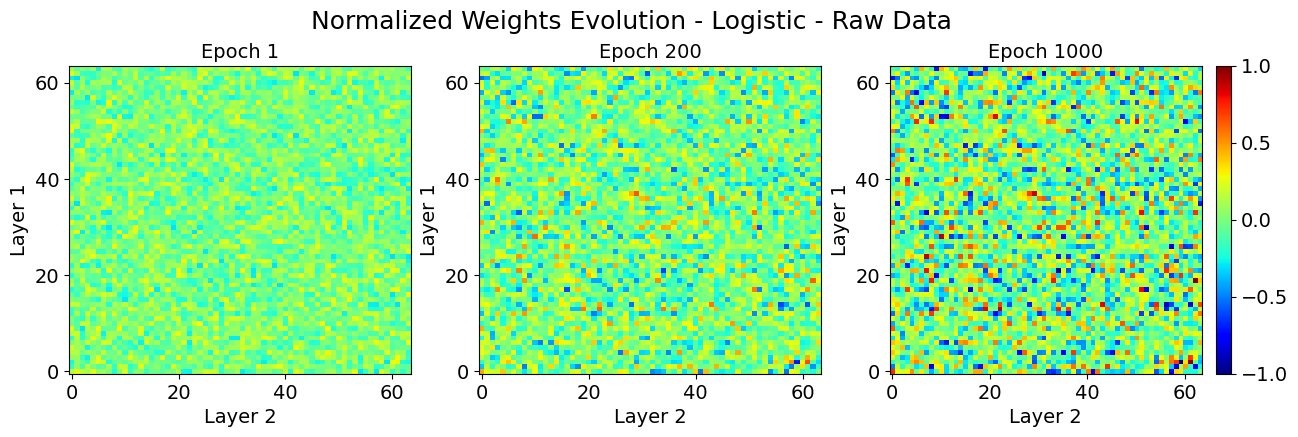

In [ ]:
# Parameters
n_layers = 1
epochs_to_plot = [1, 200, 1000]
n_neurons = 64
folder = "weights_epochs_raw_data_betax"

all_weights = []

# Load the weights from different layers and epochs
for epoch in epochs_to_plot:
    for layer in range(n_layers):
        file_path = os.path.join(folder, f"weights_epoch_{epoch}.txt")
        weights = np.loadtxt(file_path)
        all_weights.append(weights)

# Determine the value limits for the colorbars (minimum and maximum)
all_weights = np.array(all_weights)
max_abs = np.abs(all_weights).max()

# Creating figure
width_ratios = [1] * (len(epochs_to_plot) - 1) + [1]
fig = plt.figure(figsize=(5 * len(epochs_to_plot), 4), facecolor='white')
gs = gridspec.GridSpec(1, len(epochs_to_plot), width_ratios=width_ratios, wspace=0.2)
axes = [fig.add_subplot(gs[0, i]) for i in range(len(epochs_to_plot))]

# Normalized weights plot
for i, epoch in enumerate(epochs_to_plot):
    for j in range(n_layers):
        file_path = os.path.join(folder, f"pesos_epoch_{epoch}.txt")
        weights = np.loadtxt(file_path)

        weights_normalized = weights / max_abs  # Normalização
        ax = axes[i]
        im = ax.imshow(weights_normalized, aspect='auto', cmap='jet', origin='lower', vmin=-1, vmax=1)

        ax.set_title(f'Epoch {epoch}', fontsize=14)
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.set_yticks((0, 20, 40, 60))
        ax.set_xlabel(f'Layer {j+2}', fontsize = 14)
        ax.set_ylabel(f'Layer {j+1}', fontsize = 14)

        # Colorbar 
        if i == len(epochs_to_plot) - 1:
            cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04, ticks=[-1, -0.5, 0, 0.5, 1.0])
            cbar.ax.tick_params(labelsize=14)

plt.suptitle("Normalized Weights Evolution - Beta X - Raw Data", fontsize=18, y=1.02)
plt.show()



## Accuracy plot as a function of epochs - Training

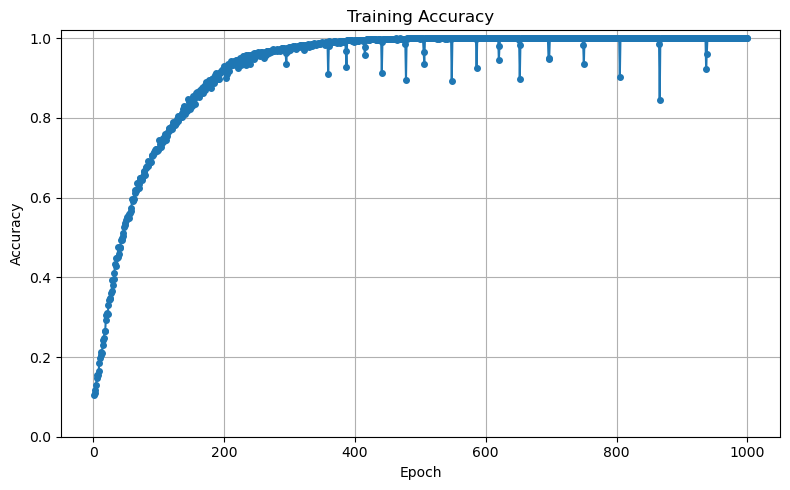

In [ ]:
# Load accuracies
train_accuracies = np.loadtxt('Accuracies/Accuracy_per_Epoch_Raw_Data_Beta_X.txt')

# Plot
plt.figure(figsize=(8, 5), facecolor='white')
plt.plot(
    range(1, len(train_accuracies) + 1),
    train_accuracies,
    marker='o',
    markersize=4,
    label='Training Accuracy'
)
plt.xlabel('Epoch')
plt.ylim(0,1.02)
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()